In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import  LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from numpy import set_printoptions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

data = pd.read_csv('../Data//Adult-Data2017.csv', na_values='?')
for column in data.columns:
    if data[column].dtype == type(object):
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))
data.drop(['age_desc'] ,  axis = 1, inplace = True)
data.drop(['id'] ,  axis = 1, inplace = True)
data.replace("?",np.nan,inplace=True) #replace ? with nan

In [ ]:
total_missing_data = data.isnull().sum().sort_values(ascending=False)
percent_of_missing_data = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat(
    [
        total_missing_data, 
        percent_of_missing_data
    ], 
    axis=1, 
    keys=['Total', 'Percent']
)
missing_data.head(10)

,Total,Percent
age,2,0.284091
Class/ASD,0,0.000000
A9_Score,0,0.000000
A2_Score,0,0.000000
A3_Score,0,0.000000
A4_Score,0,0.000000
A5_Score,0,0.000000
A6_Score,0,0.000000
A7_Score,0,0.000000
A8_Score,0,0.000000


#### Missing Data mean value  or dropna()

In [ ]:
data.loc[(data['age'].isnull())]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
62,0,0,0,0,0,0,0,0,0,0,NaN,1,10,0,0,52,0,0,5,0
91,0,1,0,0,1,0,1,0,0,1,NaN,0,10,0,0,36,0,4,5,0


In [ ]:
data.age[62]=data.age.median()
data.age[91]=data.age.median()
data.loc[(data['age'].isnull())]

C:\Users\Basma\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Basma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD


## ANOVA

In [ ]:
X_Feature = data.iloc[:,0:19]  #independent columns
Y_Feature = data.iloc[:,19]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeaturesANOVA = SelectKBest(score_func=f_classif, k=10)
fitANOVA = bestfeaturesANOVA.fit(X_Feature,Y_Feature)
# summarize scores
set_printoptions(precision=3)
dfscores = pd.DataFrame(fitANOVA.scores_)
dfcolumns = pd.DataFrame(X_Feature.columns)
#concat two dataframes for better visualization 
ANOVAfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)
ANOVAfeatureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(ANOVAfeatureScores )

            Feature        Score
0          A1_Score    68.228532
1          A2_Score    75.372977
2          A3_Score   169.558180
3          A4_Score   198.980081
4          A5_Score   284.472758
5          A6_Score   378.950728
6          A7_Score    98.914620
7          A8_Score    41.837241
8          A9_Score   475.766584
9         A10_Score   122.845954
10              age     2.489784
11           gender     4.564842
12        ethnicity    11.108392
13          jundice     7.402575
14           austim    22.814258
15    contry_of_res     0.200117
16  used_app_before     1.364057
17           result  1456.489621
18         relation     2.282219


In [ ]:
print('Univariate Selection using ANOVA')
print(ANOVAfeatureScores.nlargest(15,'Score'))  #print 15 best features

Univariate Selection using ANOVA
      Feature        Score
17     result  1456.489621
8    A9_Score   475.766584
5    A6_Score   378.950728
4    A5_Score   284.472758
3    A4_Score   198.980081
2    A3_Score   169.558180
9   A10_Score   122.845954
6    A7_Score    98.914620
1    A2_Score    75.372977
0    A1_Score    68.228532
7    A8_Score    41.837241
14     austim    22.814258
12  ethnicity    11.108392
13    jundice     7.402575
11     gender     4.564842


## Chi

In [ ]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fitChi = bestfeatures.fit(X_Feature,Y_Feature)
dfscores = pd.DataFrame(fitChi.scores_)
dfcolumns = pd.DataFrame(X_Feature.columns)
#concat two dataframes for better visualization 
ChifeatureScores = pd.concat([dfcolumns,dfscores],axis=1)
ChifeatureScores.columns = ['Feature','Score']  #naming the dataframe columns
ChifeatureScores

,Feature,Score
0,A1_Score,17.362110
1,A2_Score,37.329052
2,A3_Score,74.316582
3,A4_Score,78.401210
4,A5_Score,101.795901
5,A6_Score,176.688134
6,A7_Score,50.635852
7,A8_Score,13.892553
8,A9_Score,192.283341
9,A10_Score,44.679599


In [ ]:
print('Univariate Selection using chi')
print(ChifeatureScores.nlargest(15,'Score'))  #print 15 best features

Univariate Selection using chi
      Feature       Score
17     result  608.887098
8    A9_Score  192.283341
5    A6_Score  176.688134
4    A5_Score  101.795901
3    A4_Score   78.401210
2    A3_Score   74.316582
6    A7_Score   50.635852
9   A10_Score   44.679599
1    A2_Score   37.329052
12  ethnicity   26.791699
10        age   22.739639
14     austim   19.294792
0    A1_Score   17.362110
7    A8_Score   13.892553
13    jundice    6.626188


## correlation

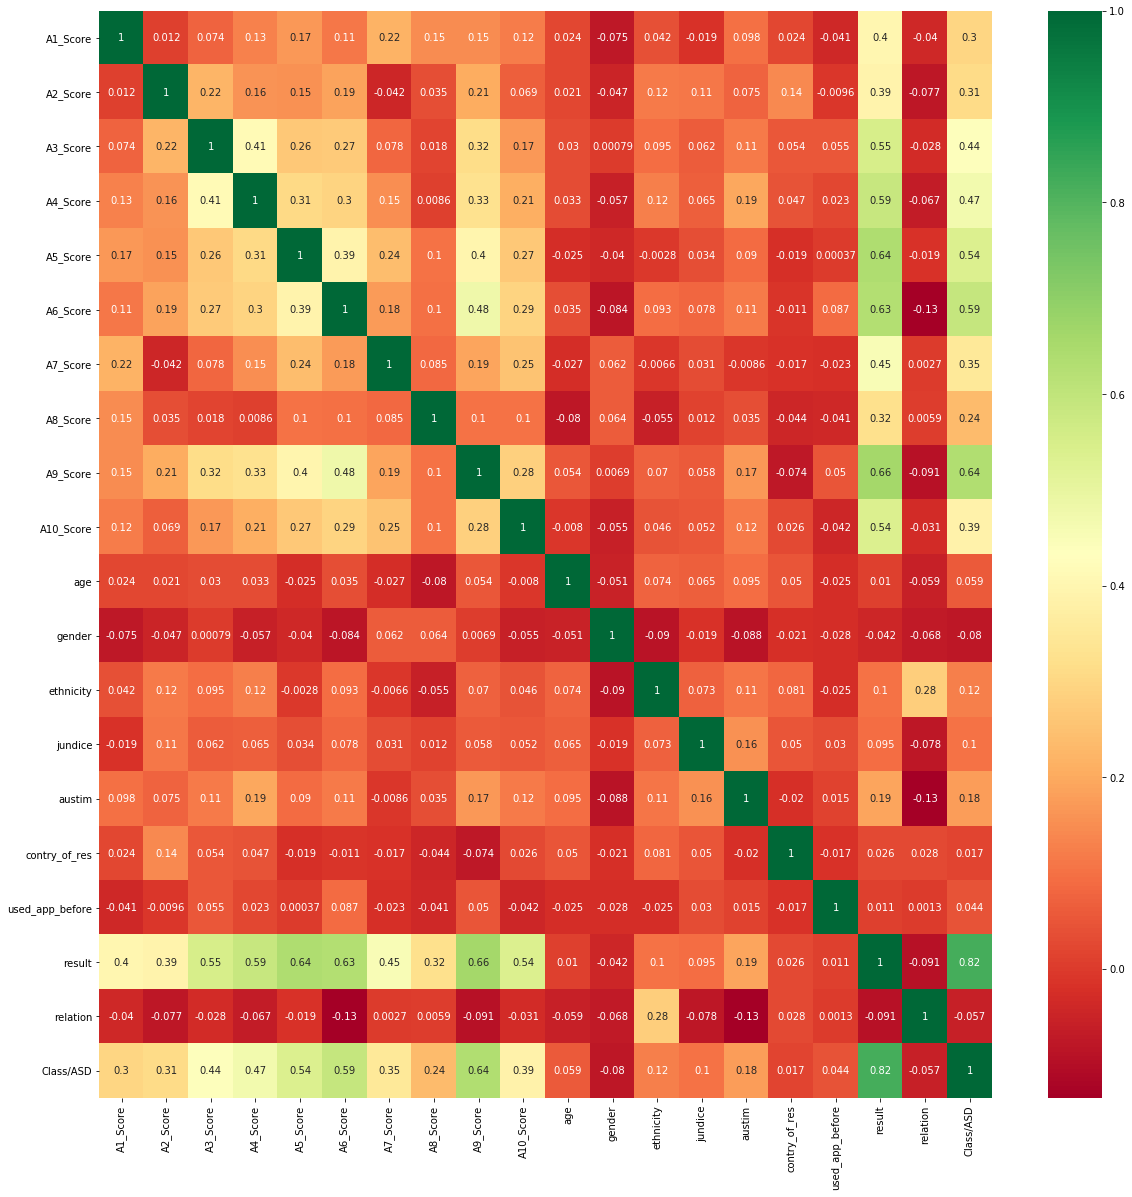

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")